# 📚 Importing Libraries

In [1]:
#imported all of the relevant libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 📁 Dataset

In [2]:
wine=pd.read_csv("winequality-red.csv")
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# See the number of rows and columns
print("Rows, columns: " + str(wine.shape))

Rows, columns: (1599, 12)


In [4]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
#check missing values
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
#check duplicate values
wine.duplicated().sum()

240

In [7]:
wine.drop_duplicates(inplace=True)
wine.shape

(1359, 12)

# Data Visualization 📊📈📉

# 🌡️Heatmap 

<AxesSubplot:>

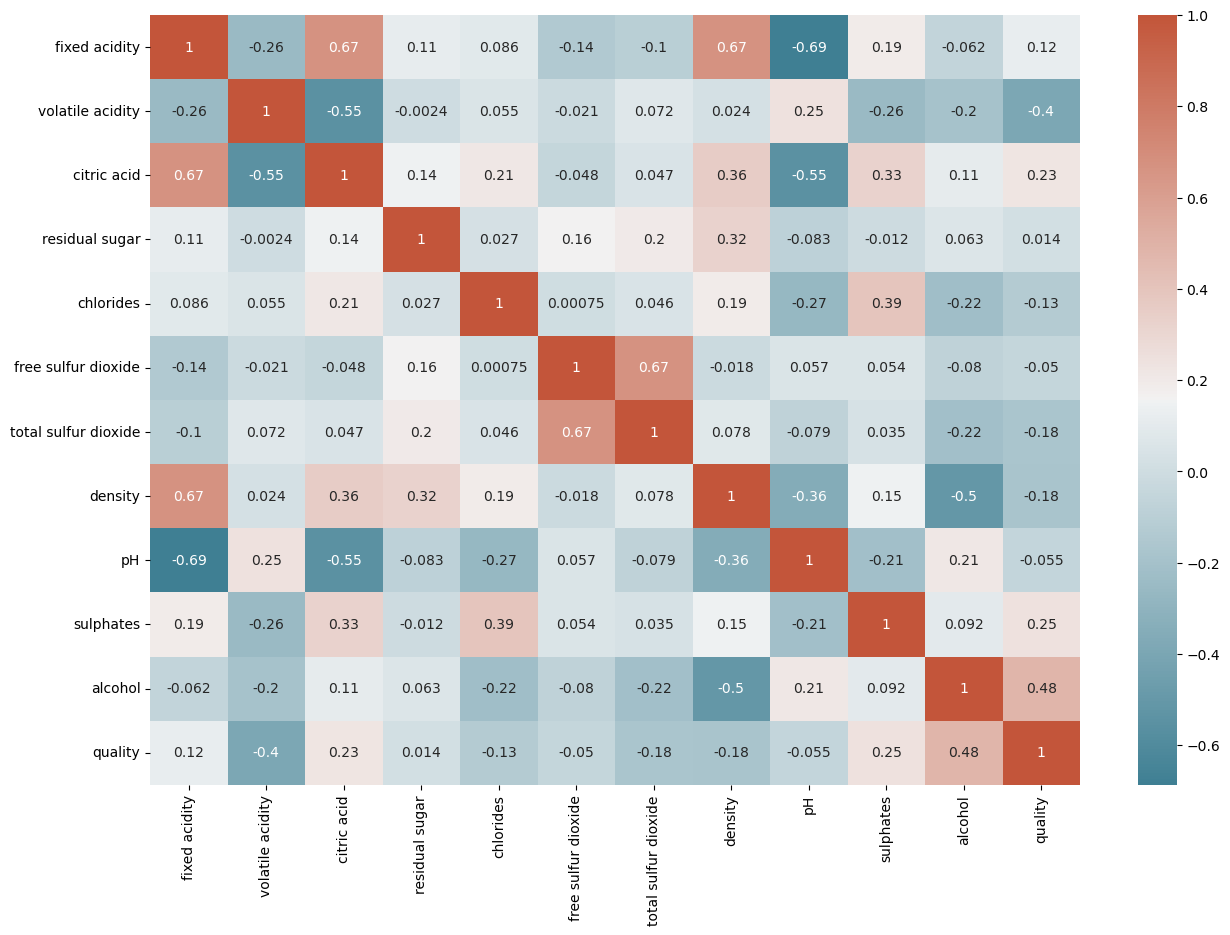

In [8]:
corr = wine.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# 📊 HistPlot

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

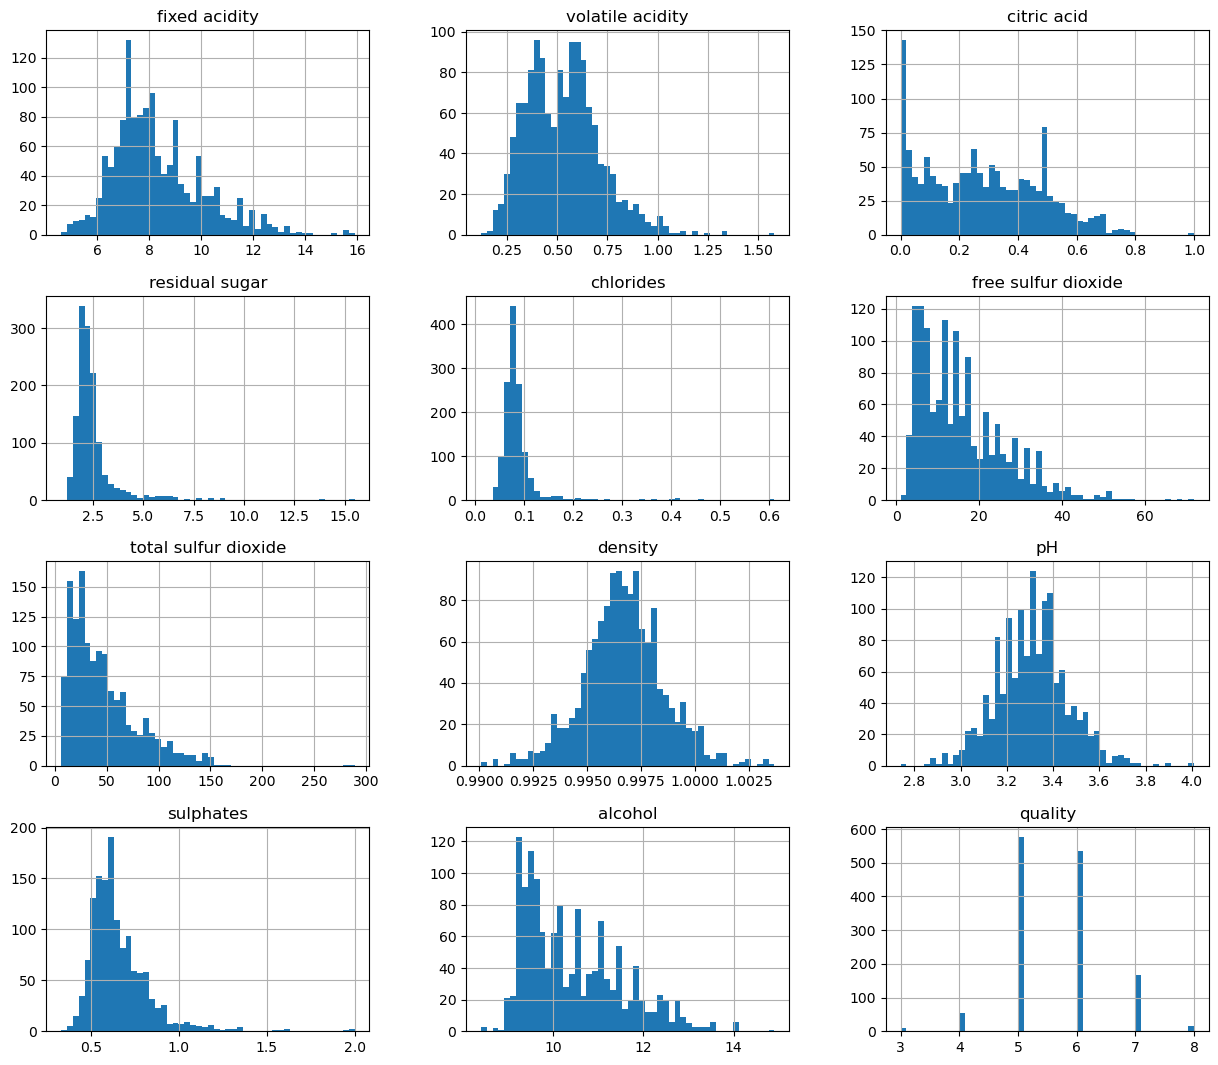

In [9]:
wine.hist(figsize=(15,13),bins=50)

# 📊 Pair Plot

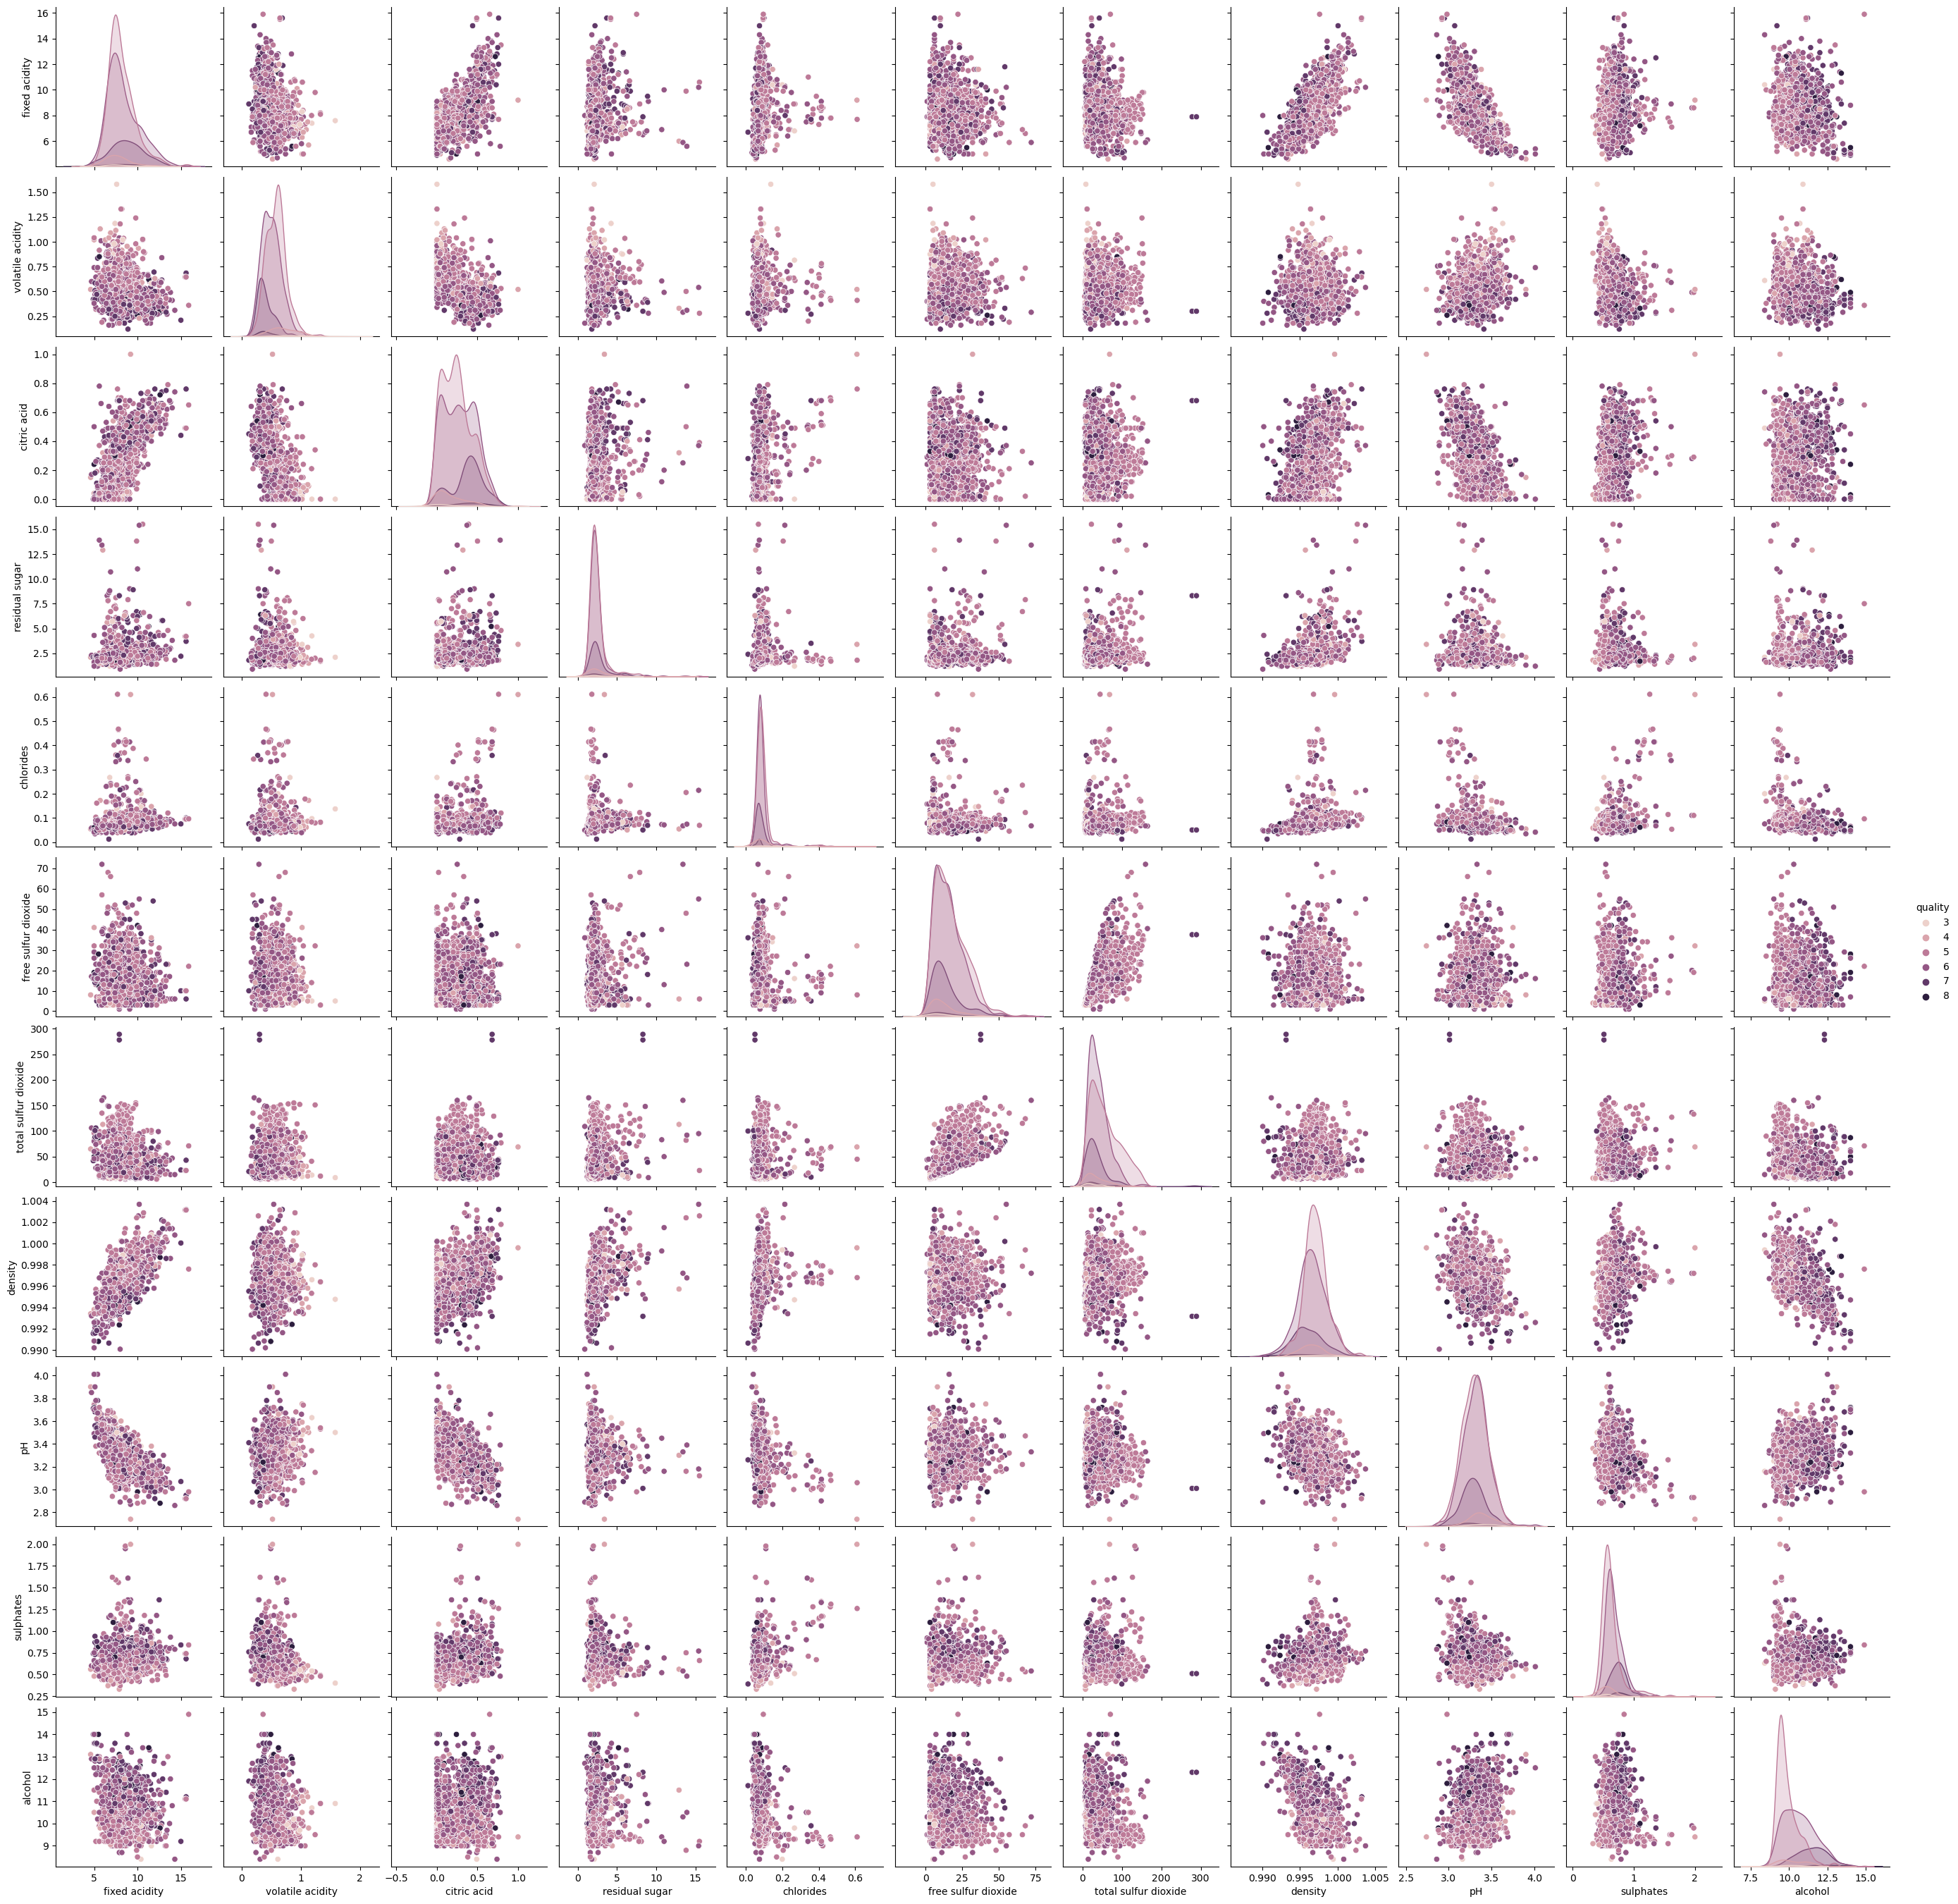

In [10]:
sns.pairplot(wine, hue='quality')

# 🛠️ Feature Engineering 

In [11]:
#Prepare the data which will define the predictor and response variable:
x=wine.drop("quality",axis=1) #input
y=wine["quality"]  #output

In [12]:
#split data into the train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=200)
# the test set will be 20% of the whole data set

# 📈Model Training: Linear Regression 

In [13]:
#fit the model on the training set.
model=LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [14]:
# Predict from the test dataset
predictions = model.predict(x_test)

# 🧪Model Evaluation 


In [15]:
#Once we fit the model, then we have to print all coefficients.
print (model.intercept_)
print (model.coef_)

15.1620363577488
[ 1.06326322e-02 -1.29931134e+00 -1.77538089e-01  3.38187498e-02
 -1.91415409e+00  1.92921203e-03 -3.16714481e-03 -1.08417372e+01
 -3.50371775e-01  8.87218279e-01  2.56558191e-01]


In [16]:
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
r_squared = r2_score(y_test,model.predict(x_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MSE: 0.48805729678123555
RMSE: 0.6986109767110988
R2 Score: 0.3324996571760249


# 🎯Model Predictions 

In [17]:
predictions

array([6.36443143, 5.17964181, 5.59878656, 5.64815359, 5.39994737,
       5.84439475, 5.25331401, 5.28958104, 5.13937132, 5.84263094,
       5.59029394, 5.79106975, 6.68469362, 6.04715093, 5.95742963,
       5.03487049, 6.22253264, 5.751522  , 5.37294528, 5.63952635,
       5.722781  , 6.04346588, 5.36480768, 4.985057  , 4.96287409,
       4.14557432, 5.20163636, 4.94853676, 5.43418327, 5.89657313,
       5.70149571, 5.20737152, 6.12735138, 5.09022332, 5.61647768,
       5.60332689, 6.02170016, 6.58365591, 5.28303744, 6.28883408,
       4.99261994, 6.08969063, 5.63856231, 4.77606133, 5.34766396,
       6.60644967, 6.5583142 , 6.5143507 , 6.33436169, 5.25508175,
       5.59235093, 5.29696781, 4.91574391, 5.56784866, 5.2219458 ,
       5.50815954, 5.24951846, 5.73398286, 6.50037126, 5.79467881,
       5.50630811, 5.10024424, 5.32924754, 5.74184447, 5.46513346,
       5.92762142, 6.06191047, 4.07844601, 5.09802482, 6.05906716,
       6.29618613, 5.07220517, 5.06800949, 5.15079505, 5.61239

In [18]:
#Converting in Binary Predection
prediction = ( predictions> 0).astype(int)
prediction 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])